<a href="https://colab.research.google.com/github/huyphangia/CS114.K21.KHTN/blob/master/%C4%90%E1%BB%93_%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Đồ án tự động nhận diện điểm và mã số sinh viên được viết tay
* Lấy ý tưởng từ vấn đề của một giáo viên dạy chính trị, trong một lần đứng lớp đã kể rằng cô và đồng nghiệp rất hay bị nhầm khi nhập điểm thi, điểm kiểm tra từ bài mà mình chấm vào file trên excel vì số lượng bài rất nhiều,phải mất nhiều công sức để rà soát xem mình nhập đã đúng chưa và đôi khi dẫn đến tình trạng sinh viên khiếu nại, phúc khảo điểm.
* Cá nhân em nghĩ ra ý tưởng xây dựng hệ thống mà chỉ cần thầy/cô chụp hình phần bài gồm MSSV và điểm của học sinh, hệ thống sẽ nhận diện và ghi phần điểm cũng như MSSV của học sinh tương ứng vào từng hàng trong file csv(tương tự như excel)
* Để hệ thống có thể hoạt động một cách bình thường, chúng ta cần thêm một tờ giấy A4 như hình vào tờ làm bài của mỗi thí sinh  
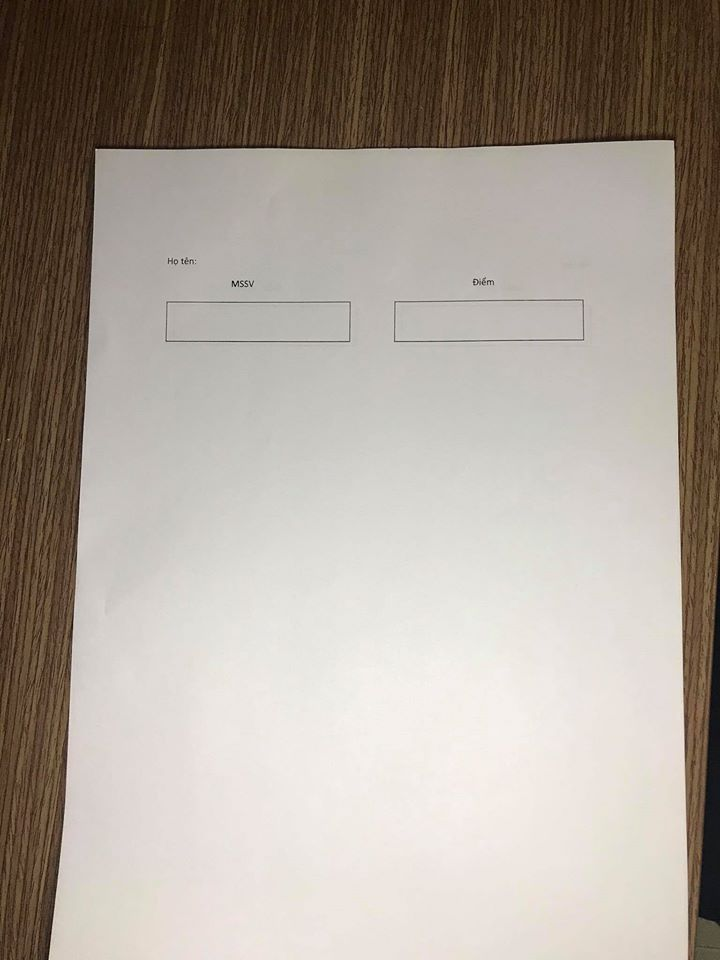

* Tờ giấy này gồm họ tên, hai khung, khung đâu tiên yêu cầu thí sinh ghi MSSV, và khung thứ hai sẽ là điểm của bài làm mà giáo viên sẽ ghi trực tiếp vào, phần còn trống của tờ giấy có thể được tận dụng để ghi đề các câu hỏi, tuy nhiên thí sinh và người chấm không được tự ý viết gì thêm lên tờ giấy (ý tưởng tạo một tờ giấy đặc biệt để cho hệ thống hoạt động tốt hơn dựa trên ý tưởng tờ giấy trắc nghiệm khi thi THPT quốc gia cũng có những phần đặc biệt để máy có thể nhận biết và chấm)
# Mô tả bài toán:

- Input : Ảnh chụp có gồm hai khung có chứa MSSV và điểm của sinh viên
- Output : Lưu điểm của sinh viên và mã số sinh viên trong input vào file csv 


#Các bước thực hiện:

*   Bước 1: Xây dựng một model nhận diện chữ số viết tay bằng dữ liệu tự thu thập được 
*  Bước 2: Nhận diện khung chứa điểm và khung chứa MSSV, sau đó trích xuất hai khung chứa số ra hai ảnh khác nhau
*  Bước 3: Nhận diện các số trong dãy, tách chúng thành các số đơn lẻ và trích xuất thành các ảnh tương ứng
*  Bước 4: Dùng Model đã train ở bước 1 để nhận diện các ảnh đã cắt ở bước 3 và lưu vô file csv 





#Bước 1: Xây dựng model



1.1   Thu thập và xử lý dữ liệu dữ liệu thô: 5 bước chính
* Dữ liệu được chụp bằng điện thoại và chuyển vào máy tính
* Cắt các ảnh dữ liệu thô và lưu các ảnh đã cắt vào các folder thích hợp
* Resize ảnh về 28x28 chuyển về dạng binary
* Chuyển ảnh từ dạng binary về vector
* Tiến hành gắn nhãn cho các ảnh và lưu file dưới dạng csv
** Upload dữ liệu lên github
** Link chứa mô tả chi tiết:


Import các thư viện cần thiết

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


1.2 Load data

In [8]:
!git clone https://github.com/anhkhoa039/CS114.K21.KHTN.git

fatal: destination path 'CS114.K21.KHTN' already exists and is not an empty directory.


* Xem sơ qua về tệp dữ liệu

In [9]:
import pandas as pd
data = pd.read_csv('/content/CS114.K21.KHTN/data.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Kích thước tệp

In [10]:
data.shape

(2000, 785)

1.3 Phân chia tệp để train và để test
* Tỉ lệ 90%-10% cho training

In [11]:
# training data
y_train = data.iloc[:1800,0]
y_train = pd.DataFrame(y_train).to_numpy()
X_train = data.iloc[:1800,1:785]
X_train = pd.DataFrame(X_train).to_numpy()
#testing data
y_test = data.iloc[1800:,0]
y_test = pd.DataFrame(y_test).to_numpy()
X_test = data.iloc[1800:,1:785]
X_test = pd.DataFrame(X_test).to_numpy()
X_train.shape

(1800, 784)

In [12]:
X_test.shape

(200, 784)

1.4 Scale data
* Sử dụng standard scale

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

1.5 Train model:
Sử dụng hai model chính sau
* KNN
* SVM


Đầu tiên là KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

Tiếp theo là SVM

In [15]:
from sklearn.svm import SVC
svm_clf= SVC(C=1)
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

1.6 Evaluation và fine-tuning
* Đánh giá model
* fine-tuning

Đánh giá model

In [16]:
from sklearn.model_selection import cross_val_score

KNN

In [17]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.09666667, 0.09666667, 0.10166667])

SVM

In [18]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.10333333, 0.10333333, 0.10333333])

Có thể thấy điểm số rất thấp, áp dụng thêm một vài cách để tăng accuracy

Fine-tuning

Sử dụng tệp train đã được scale 

* SVM

In [19]:
from sklearn.svm import SVC
svm_clf= SVC(C=1)
svm_clf.fit(X_train_scaled, y_train)
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.10333333, 0.10333333, 0.10333333])

* KNN



In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train_scaled, y_train)
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y 

array([0.09666667, 0.09666667, 0.10166667])

Sử dụng gridsearch để tìm ra hyperparameter tối ưu nhất

* KNN

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [ 1, 2, 3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

Vậy ta thấy để model tốt nhất thì k=1 và weights = uniform

In [23]:
grid_search.best_score_

0.10055555555555555

* SVC


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [25]:
grid_search.best_estimator_.C

0.001

hyperparameter phù hợp nhất trong trường hợp này là 0.01

In [26]:
grid_search.best_score_

0.10222222222222221

Tương tự như KNN, không tăng nhiều

1.7 Dự đoán trên testing data và kết luận 

* KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='uniform', n_neighbors=1)
knn_clf.fit(X_train, y_train)
y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.125

* SVM 


In [28]:
from sklearn.svm import SVC
svm_clf= SVC(C=0.01)
svm_clf.fit(X_train, y_train)
y_svm_pred = svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_svm_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.07

#Kết luận bước 1: 
* Do dữ liệu tự thu thập quá nhỏ, dẫn đến hiện tượng overfit trên training data
* Ảnh tự chụp chất lượng không đảm bảo
#Hướng khắc phục:
* Xây dựng bộ data to hơn
* Sử dụng bộ data mnist
* Dùng các kỹ thuật feature engineering mới
* Sử dụng các thuật toán phức tạp hơn trong deeplearning

#Bước 2: Nhận diện khung có chứa số và tách khung

* 2.1 Chụp và upload ảnh lên colab
* 2.2 Nhận diện khung và tách ảnh

In [29]:
img = input(" Enter image path: ")

 Enter image path: abc.png


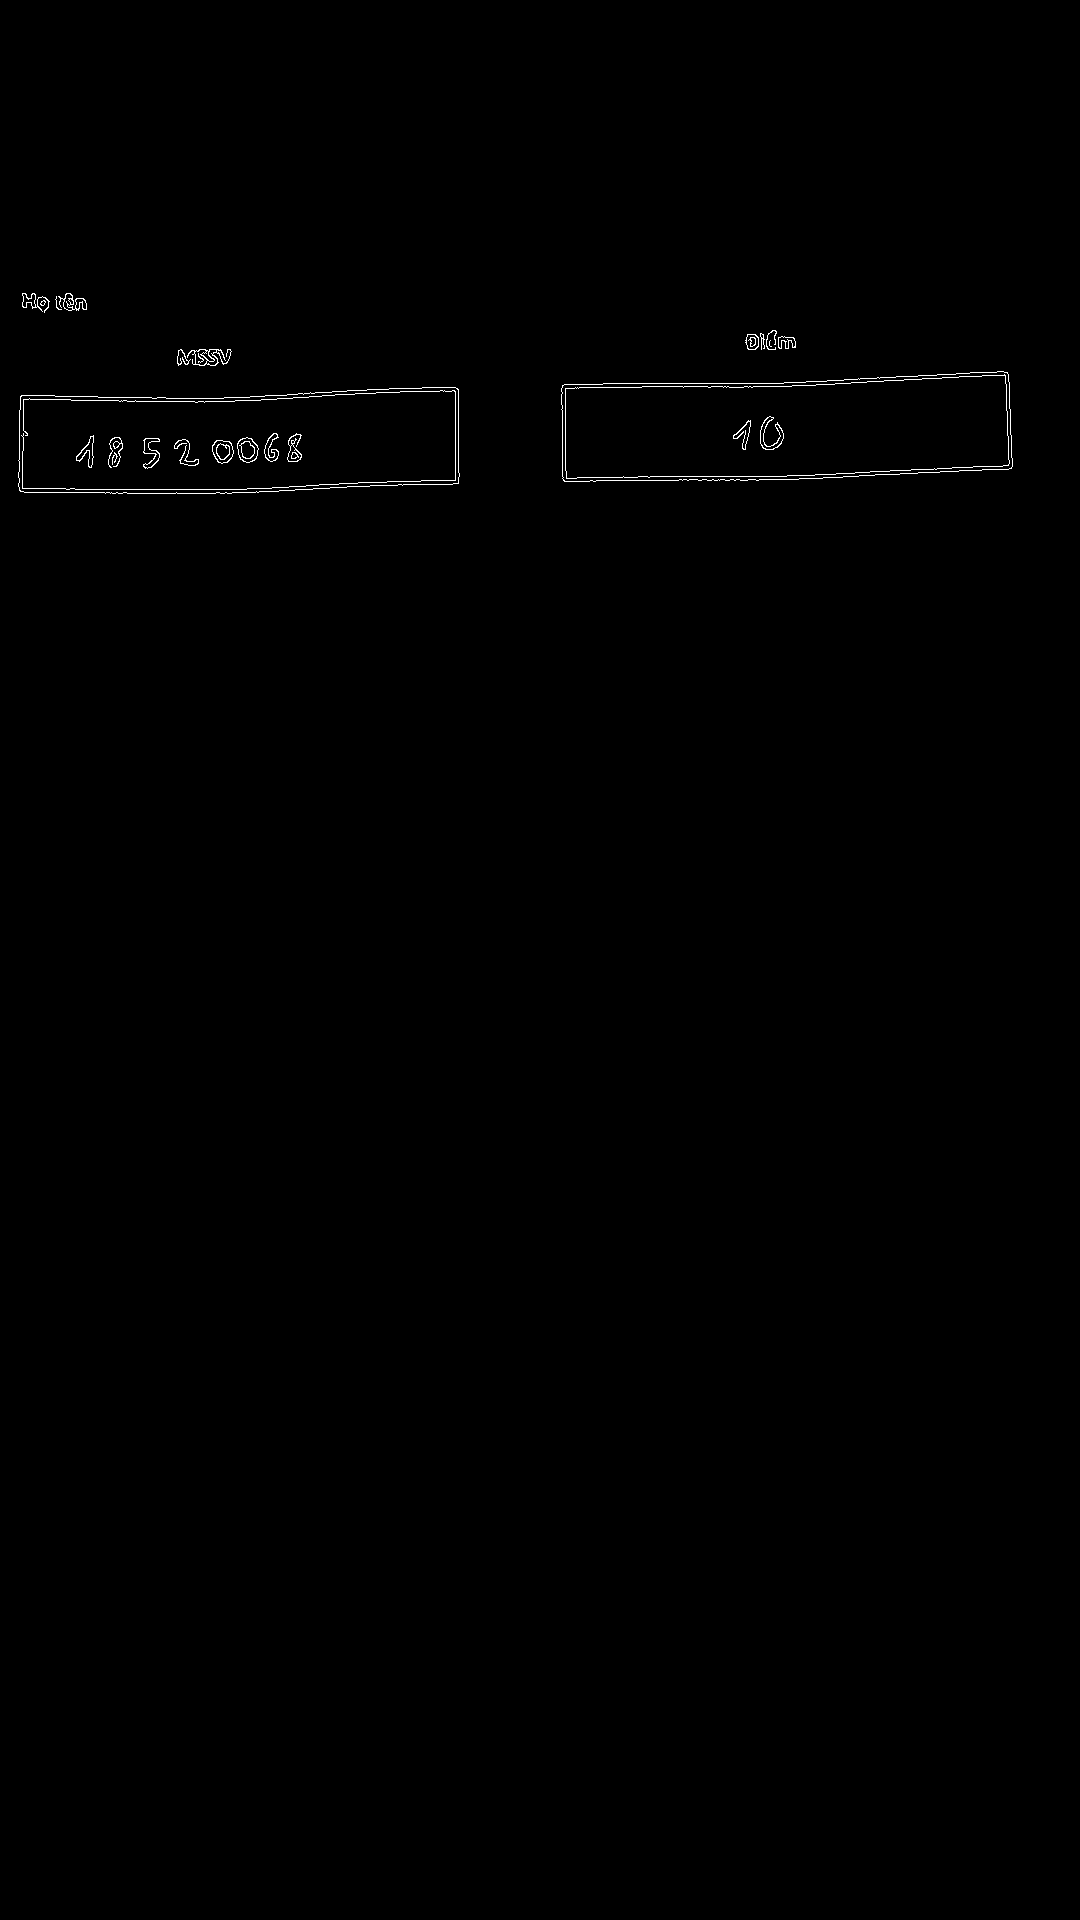

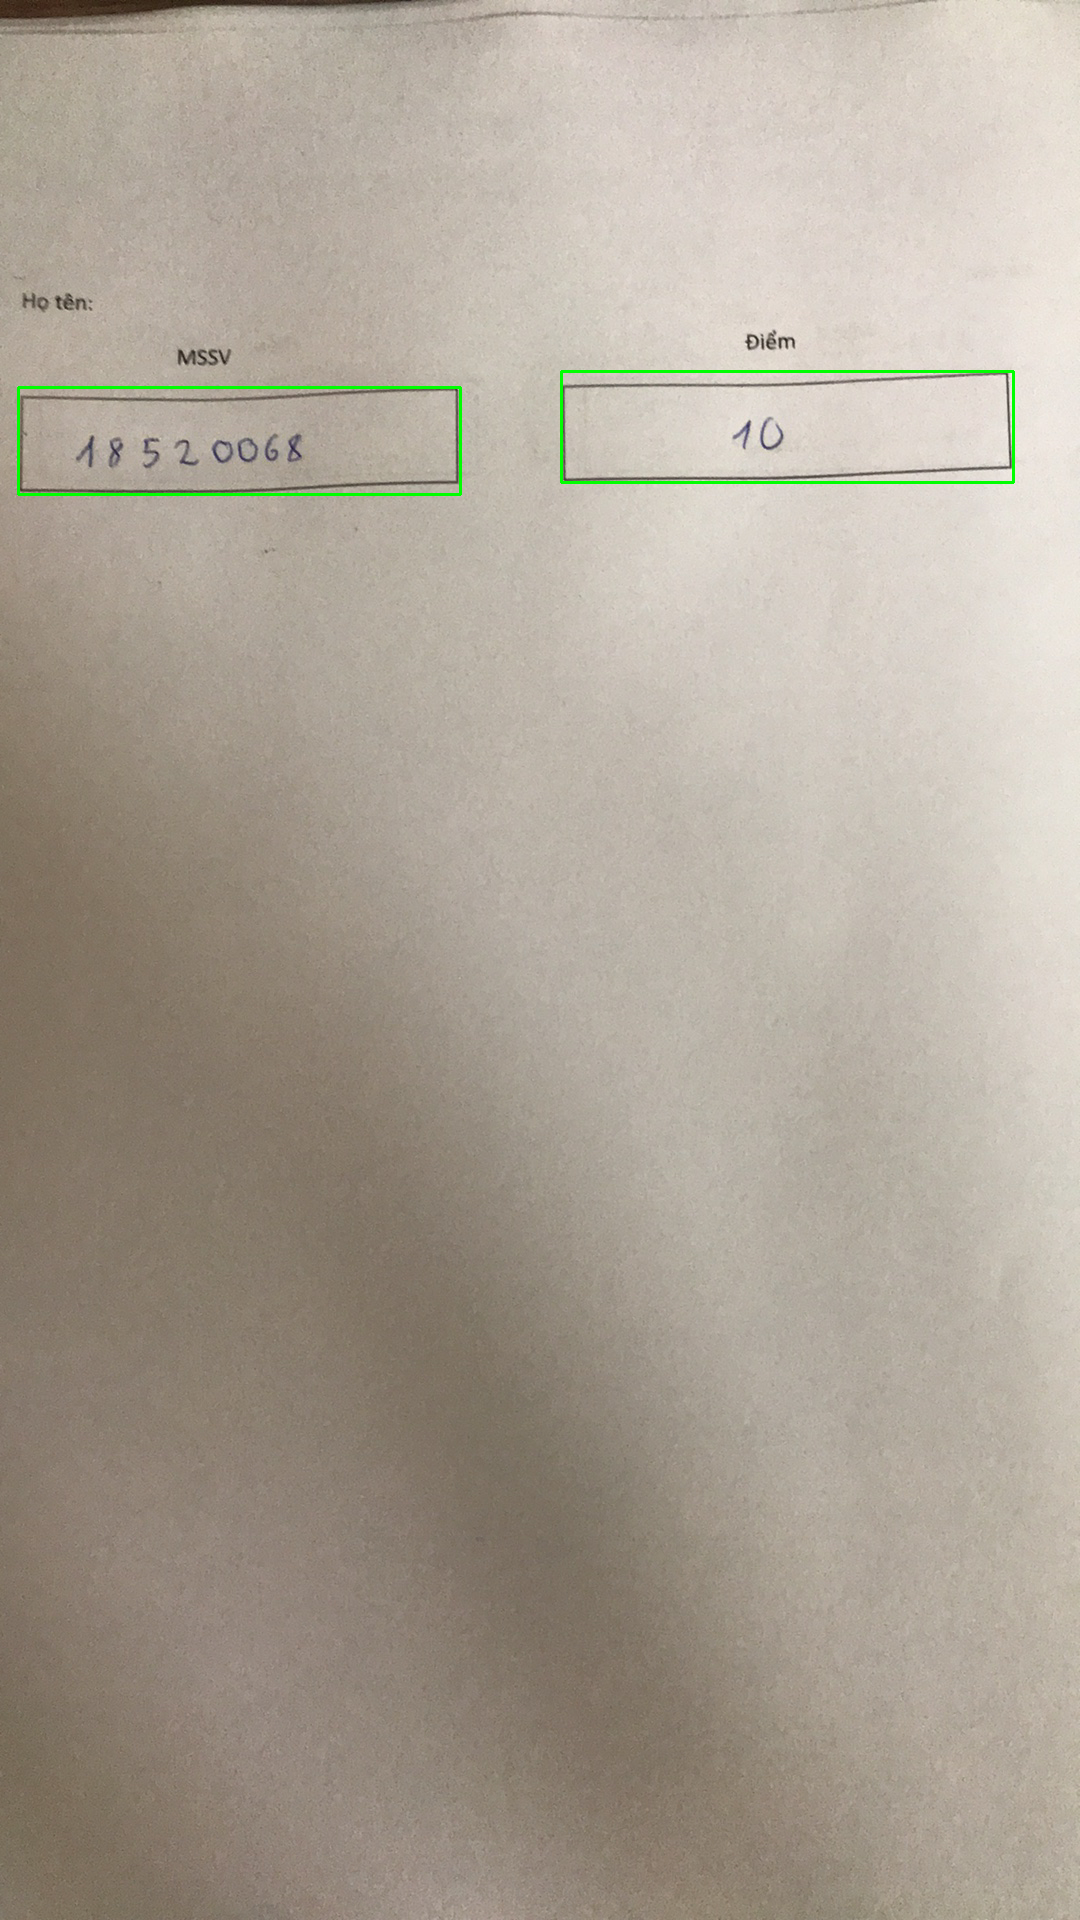

In [30]:
import cv2
from google.colab.patches import cv2_imshow

def demo(img):
  image = cv2.imread(img)
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gaus = cv2.GaussianBlur(gray, (5, 5), 0)
  edged = cv2.Canny(gaus, 10, 250)
  cv2_imshow(edged)
  (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  idx = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True) 
    if w>100 and h>10 and len(approx)==4 :
        idx+=1
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite("anh cat thu" + str(idx) + '.jpg', new_img)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        

  cv2_imshow(image)

demo(img)

#Bước 3+4: Từ hai ảnh ở bước 2, nhận diện, tách dãy số thành các số riêng lẻ và predict các số ấy, lưu vào file csv

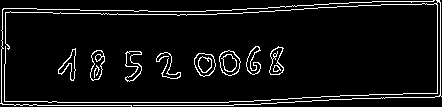

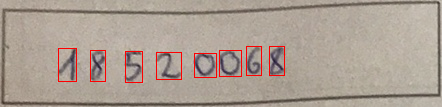

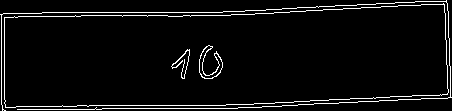

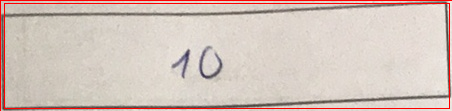

In [31]:

def cv_to_vector (img):
    vec = []
    for i in range (len(img[0])):
        for j in range (len(img[1])):
            vec.append(img[i][j])
    return vec
def detect_image(img_path):
  image = cv2.imread(img_path)
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gaus = cv2.GaussianBlur(gray, (5, 5), 0)
  _,thre = cv2.threshold(gaus,90,255,cv2.THRESH_BINARY_INV)
  edged = cv2.Canny(gaus, 10, 250)
  cv2_imshow(edged)
  (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  index = 0
  l = ""
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w>5 and h>5 and index<8:
      index+=1
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),1)
      roi = thre[y:y+h,x:x+w]
      roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
      roi = cv_to_vector(roi)
      pred = knn_clf.predict([roi])
      l=l +str(pred)
  cv2_imshow(image)
  return l

image_path1 ="anh cat thu1.jpg"
image_path2 ="anh cat thu2.jpg"
list1 = detect_image(image_path1)
list2 = detect_image(image_path2)

In [32]:
import csv

with open('X:\writeData.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    #way to write to csv file
    writer.writerow(['MSSV','ĐIỂM'])
    writer.writerow([list1,list2])
